# *Author: Kshama Purohit*
Task 1: Prediction using Supervised ML 
**GRIP @ The Sparks Foundation**
*   The objective of this task is to create and train a simple model that uses 2 variables, 'Hours' and 'Scores' to predict the score ('Scores') of a student based on the number of hours ('Hours') that they srudy for.
*   I have used simple linear regression to do the same.





In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import seaborn as sns

**Importing the relevant data, and printing the shape to calculate the amount of data. Here, it consists of 25 rows & 2 columns, i.e, 50  entries, excluding the headers.**

In [48]:
df=pd.read_csv("/content/task1.csv")
df.shape

(25, 2)

In [49]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Generating basic information of the data, to understand the data type and presence of any null values. This dataset doesnt have any null values, and has two columns, of integer and float data type respectively.**

In [50]:
df.isnull()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting a basic scatterplot, to visually observe any existing relationship between the two variables. Here we csan see the existence of a linear relationship between 'hours' and 'scores'.**

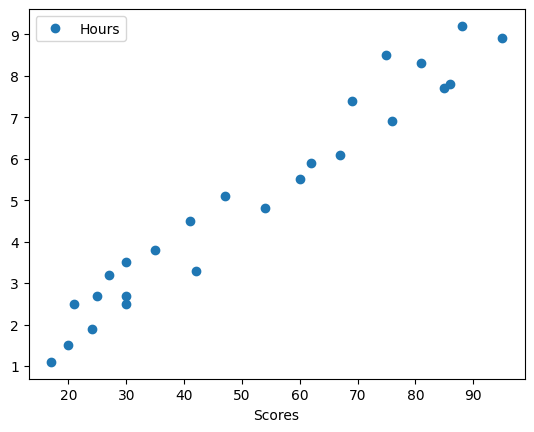

In [51]:
df.plot(x='Scores', y='Hours', style='o')
plt.show()

**Now, I am creating the model by training and testing it with test size 20%. This ensures that the data will be split in an 80-20 format, with 80% being used for training the model, and the remaining data will be used for testing the model. This can be confirmed by checking the size/shape of all 4 new datasets.**

In [52]:
x_feature = df['Hours']
y_target = df['Scores']
x_train, x_test, y_train, y_test = train_test_split(x_feature,y_target, random_state=0, test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(20,) (20,)
(5,) (5,)


**Here, the an instance of LinearRegression() is created as lm, which is used to fit the model with the training data and predict all the scores for the testing data (x_test).**

In [53]:
lm = LinearRegression()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print(x_test)
y_pred = lm.predict(x_test)
y_pred

2.018160041434662
[9.91065648]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**The output of the model prediction is stored in y_pred and is used to create a dataframe and a bar graph, to visyaliuze the extent of accuracy of the model.**

In [54]:
df2=pd.DataFrame({'Actual':y_test, 'Predcicted':y_pred})
df2

,Actual,Predcicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


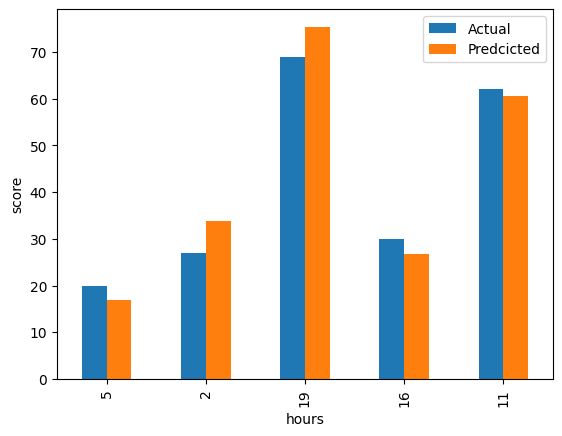

In [43]:
df2.plot(kind='bar',xlabel='hours', ylabel='score')
plt.show()

**Printing the linear regression line to further visualize the positive linear relationship.**

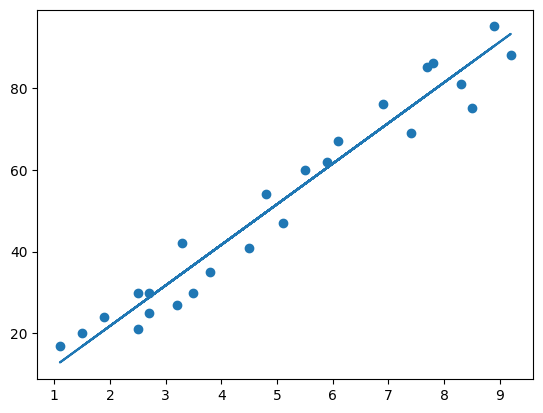

In [44]:
line = lm.coef_*x_feature+lm.intercept_

# Plotting for the test data
plt.scatter(x_feature, y_target)
plt.plot(x_feature, line);
plt.show()

**Predicting the score for 9.25 hours of study.**

In [55]:
x2_test=[[9.25]]
print("hours: 9.25 hrs")
print("predicted score obtained:", lm.predict(x2_test))

hours: 9.25 hrs
predicted score obtained: [93.69173249]


**Testing the model accuracy using Mean Absolute Error (Average of mean difference between predicted and actual values).**

In [56]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", MSE)
print("RMSE:", np.sqrt(MSE))
print("R2 score:", metrics.r2_score(y_test, y_pred))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373
R2 score: 0.9454906892105354


**As can be seen, the model has a R-2 Score of approximately 0.945, which describes how well the data fits the model. Further a Mean Absolute Error of 4.18, which can be improved, but is great for a model with such small amount of data.**